In [34]:
%autosave 180

Autosaving every 180 seconds


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from adam_wrangle import clean_grades
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

Let's read in the grades data from the wrangle module.

In [36]:
df = clean_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


Before scaling, what **important** step do we have to complete?

In [37]:
seed = 42
train, val_test = train_test_split(df, train_size=0.7,
                                   random_state=seed)

val, test = train_test_split(val_test, train_size=0.5,
                             random_state=seed)

train.shape, val.shape, test.shape

((71, 5), (15, 5), (16, 5))

Let's take a pass at the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). What kind of transformation does this scaler perform, and what will be the resulting range of values?

This is a linear transformation, which will maintain the shape of our data.

The resulting range of values will be from 0 to 1.

In [38]:
mms = MinMaxScaler()

mms.fit(train[['final_grade']])

MinMaxScaler()

In [39]:
train['final_grade_mms'] = mms.transform(train[['final_grade']])
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms
12,14,100.0,90,95,96,0.96875
102,104,70.0,75,78,72,0.21875
56,58,79.0,70,85,81,0.50000
29,31,93.0,90,96,97,1.00000
65,67,98.0,93,96,95,0.93750


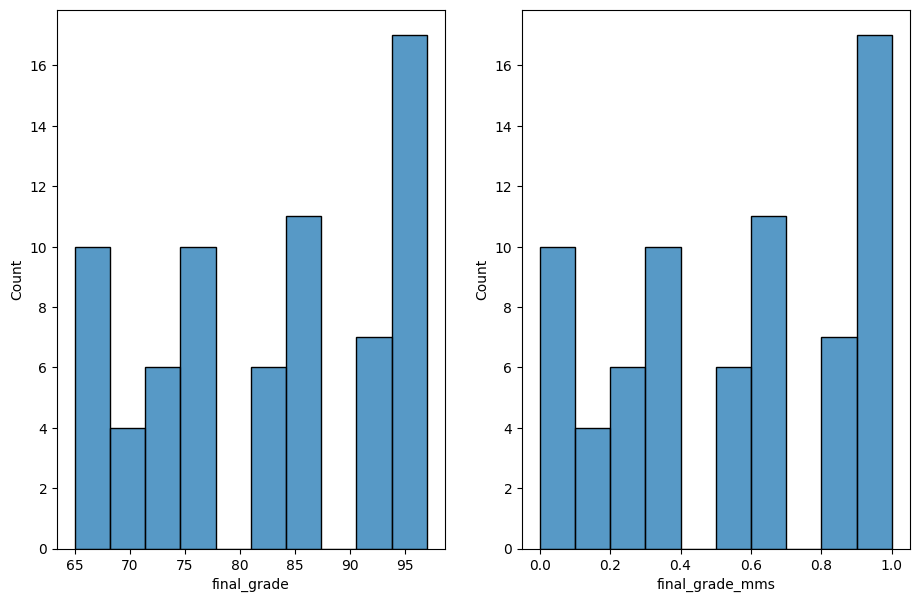

In [40]:
plt.figure(figsize=(11, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='final_grade', bins=10)

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='final_grade_mms', bins=10)

plt.show()

In [41]:
def compare_data(scaled_col, df = train, original = 'final_grade'):

    plt.figure(figsize=(11, 7))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=original, bins=10)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=scaled_col, bins=10)
    
    plt.show()

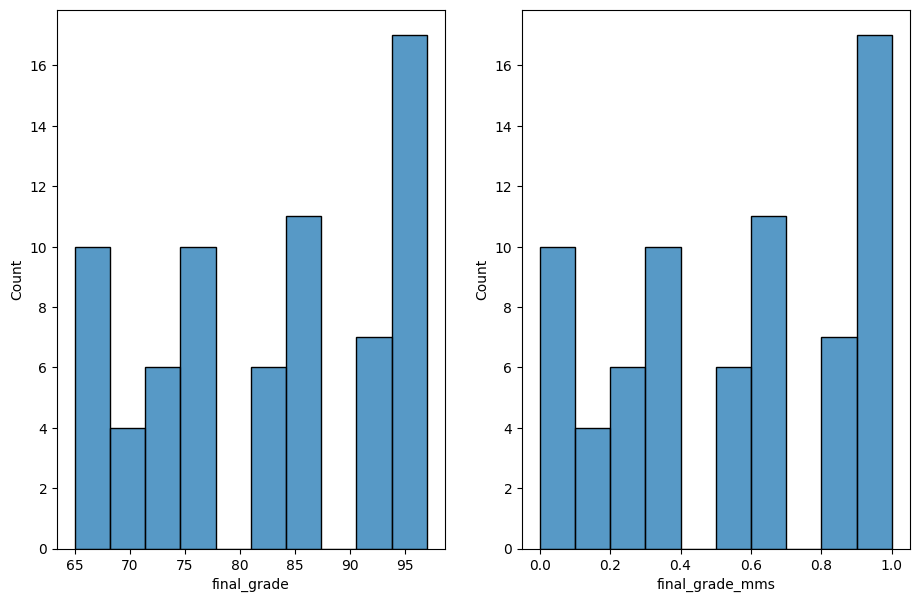

In [42]:
compare_data('final_grade_mms')

Next up is the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). What kind of transformation is this, and what is the resulting range of values?

We're expecting to see a mean of 0 and a standard deviation of 2. This will result in small negative and positive values.

In [43]:
ss = StandardScaler()

ss.fit(train[['final_grade']])

train['final_grade_ss'] = ss.transform(train[['final_grade']])

train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_ss
12,14,100.0,90,95,96,0.96875,1.252900
102,104,70.0,75,78,72,0.21875,-0.973317
56,58,79.0,70,85,81,0.50000,-0.138485
29,31,93.0,90,96,97,1.00000,1.345659
65,67,98.0,93,96,95,0.93750,1.160141


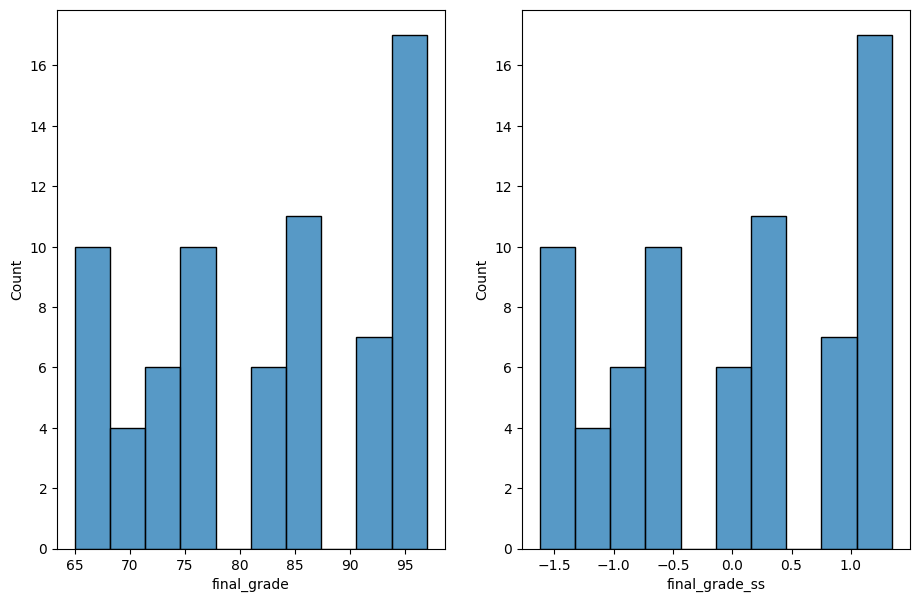

In [44]:
compare_data('final_grade_ss')

Last up we have the [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). What kind of transformation and what resulting range of values?

In [45]:
#Create an instance of the RobustScaler object
rs = RobustScaler()

#Fit the object to our desired column
rs.fit(train[['final_grade']])

#Transform the features and assign to a new column
train['final_grade_rs'] = rs.transform(train[['final_grade']])

#Did it work
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_ss,final_grade_rs
12,14,100.0,90,95,96,0.96875,1.252900,0.714286
102,104,70.0,75,78,72,0.21875,-0.973317,-0.428571
56,58,79.0,70,85,81,0.50000,-0.138485,0.000000
29,31,93.0,90,96,97,1.00000,1.345659,0.761905
65,67,98.0,93,96,95,0.93750,1.160141,0.666667


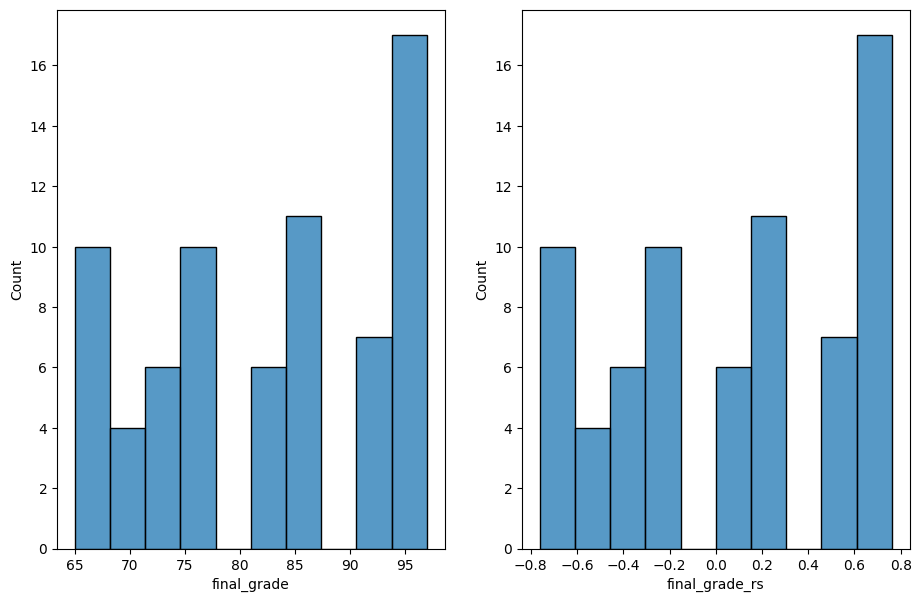

In [46]:
compare_data('final_grade_rs')

We can scale more than one column at once!

In [47]:
mms = MinMaxScaler()

mms.fit(train[['exam1', 'exam2', 'exam3']])

train[['exam1', 'exam2', 'exam3']] = mms.transform(train[['exam1', 'exam2', 'exam3']])

train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_ss,final_grade_rs
12,14,1.000000,0.892857,0.961538,96,0.96875,1.252900,0.714286
102,104,0.302326,0.357143,0.307692,72,0.21875,-0.973317,-0.428571
56,58,0.511628,0.178571,0.576923,81,0.50000,-0.138485,0.000000
29,31,0.837209,0.892857,1.000000,97,1.00000,1.345659,0.761905
65,67,0.953488,1.000000,1.000000,95,0.93750,1.160141,0.666667


In [48]:
val[['exam1', 'exam2', 'exam3']] = mms.transform(val[['exam1', 'exam2', 'exam3']])

val.head()

,student_id,exam1,exam2,exam3,final_grade
68,70,0.837209,0.892857,1.000000,97
63,65,0.302326,0.357143,0.307692,72
99,101,0.116279,0.178571,0.346154,70
48,50,0.023256,0.000000,0.000000,68
54,56,0.604651,0.535714,0.615385,85
